# 📊 Exploratory Data Analysis (EDA) – Stock Time Series Data

This notebook performs complete EDA for time series forecasting using ARIMA, Prophet, and LSTM models.

## 🔹 Load and Prepare Data

In [ ]:
import pandas as pd
df=pd.read_csv("/content/cleaned_stock_data.csv",parse_dates=["Date"])

In [ ]:
df.set_index("Date",inplace=True)
df=df[['Open','High','Low','Close','Volume']]

In [ ]:
print(df.head())
print(df.info())
print(df.describe())

                 Open       High        Low      Close     Volume
Date                                                             
2020-01-02  71.627092  72.681289  71.373218  72.620842  135480400
2020-01-03  71.847125  72.676454  71.689965  71.914825  146322800
2020-01-06  71.034709  72.526533  70.783248  72.487846  118387200
2020-01-07  72.497522  72.753816  71.926907  72.146935  108872000
2020-01-08  71.849525  73.609737  71.849525  73.307503  132079200
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 505 entries, 2020-01-02 to 2021-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    505 non-null    float64
 1   High    505 non-null    float64
 2   Low     505 non-null    float64
 3   Close   505 non-null    float64
 4   Volume  505 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 23.7 KB
None
             Open        High         Low       Close        Volume
count  505.000000  505.000000  5

## 🔹 Check Date Range, Frequency, and Missing Data

In [ ]:
#missing and duplicated
print("Missing values:\n",df.isnull().sum())
print("Duplicate rows:",df.duplicated().sum())

Missing values:
 Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64
Duplicate rows: 0


In [ ]:
# time range and frequency
print("Start date:",df.index.min())
print("End date:",df.index.max())
print("Total records:",len(df))
print("Date frequency:",pd.infer_freq(df.index))

Start date: 2020-01-02 00:00:00
End date: 2021-12-31 00:00:00
Total records: 505
Date frequency: None


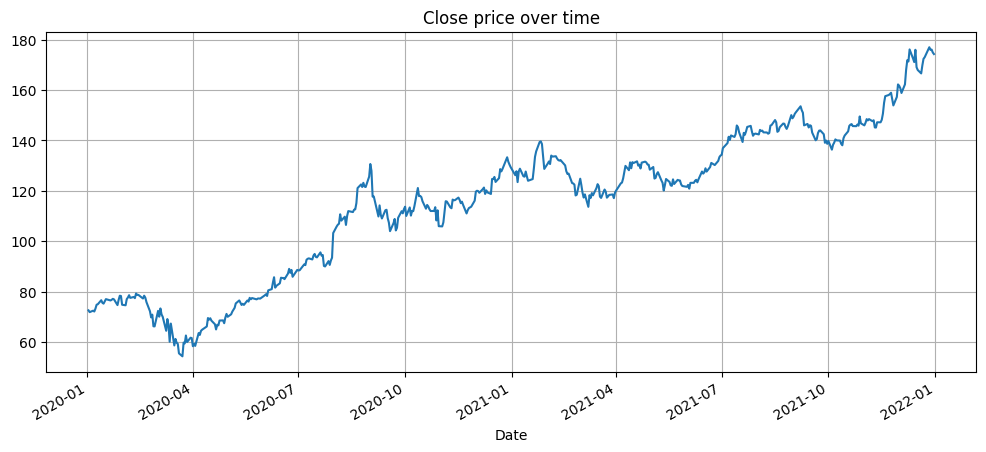

In [ ]:
# visualize the trend
import matplotlib.pyplot as plt
df['Close'].plot(figsize=(12,5),title="Close price over time")
plt.grid(True);plt.show()

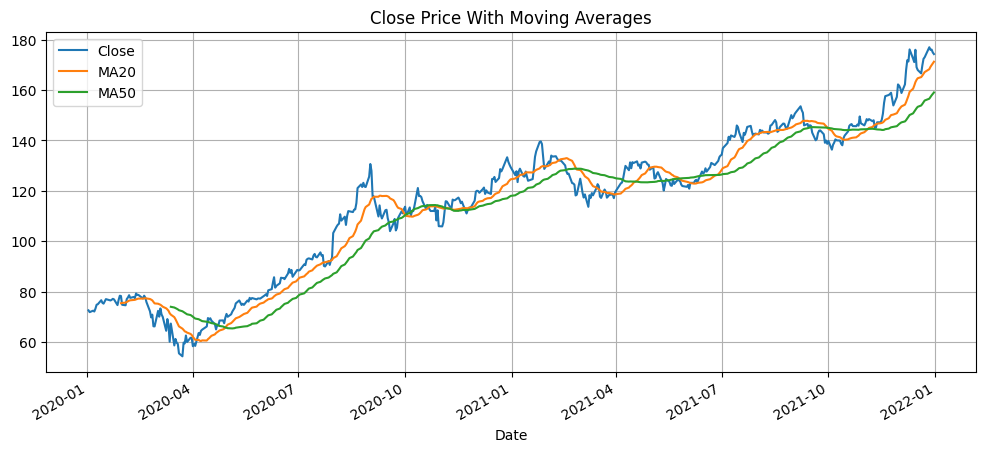

In [ ]:
# moving averages of last 20 and 50 days
df['MA20']= df['Close'].rolling(window=20).mean()
df['MA50']= df['Close'].rolling(window=50).mean()
df[['Close','MA20','MA50']].plot(figsize=(12,5),title="Close Price With Moving Averages")
plt.grid(True);
plt.show()

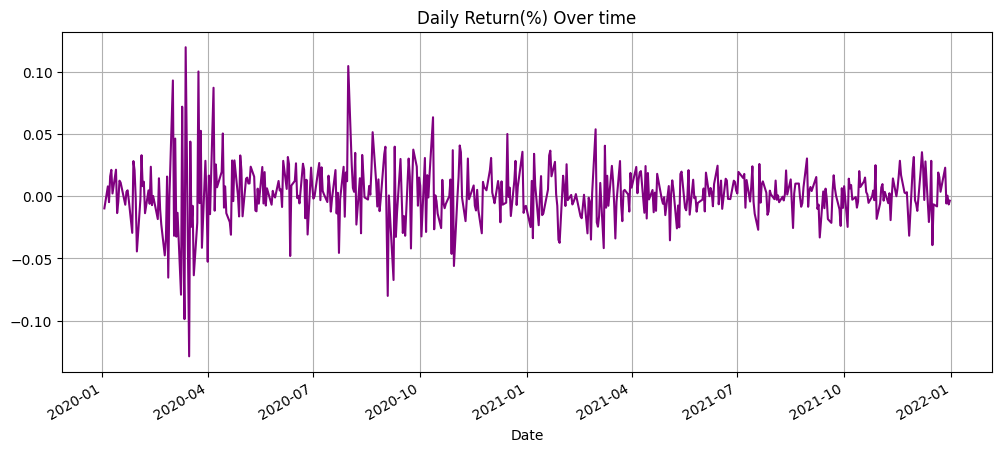

In [ ]:
# daily return (means how much stock prices are changed according to the previous day)
df['Daily_Return'] = df['Close'].pct_change()
df['Daily_Return'].plot(figsize=(12,5),title="Daily Return(%) Over time",color='purple')
plt.grid(True);
plt.show()

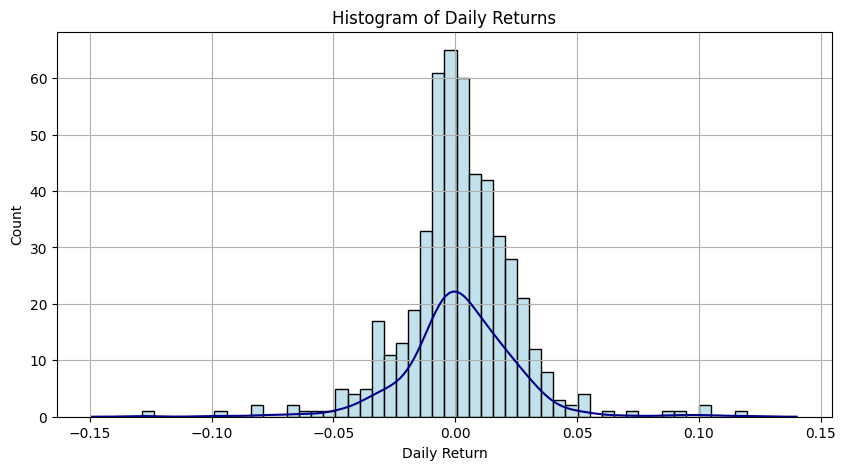

In [ ]:
# Daily Return distribution - visualizing  how the daily percentage changes in stock prices are spread out overtime- whether most changes are small ,big,positive,negative
import seaborn as sns
plt.figure(figsize=(10,5))
sns.histplot(df['Daily_Return'].dropna(),bins=50,color='lightblue')
sns.kdeplot(df['Daily_Return'].dropna(),color='darkblue')
plt.title("Histogram of Daily Returns")
plt.xlabel("Daily Return")
plt.grid(True)
plt.show()

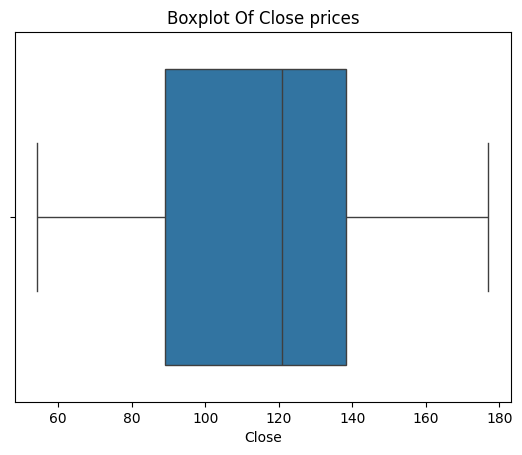

In [ ]:
#boxplot - outlier detection
sns.boxplot(x=df['Close'])
plt.title("Boxplot Of Close prices")
plt.show()

Outliers detected: 0


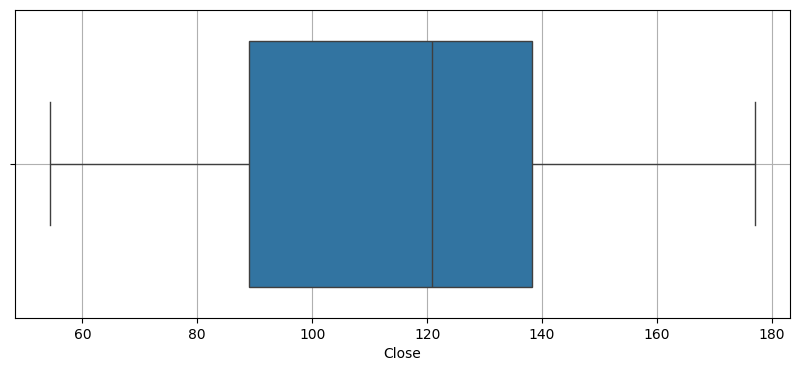

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Q1 = df['Close'].quantile(0.25)
Q3 = df['Close'].quantile(0.75)
IQR = Q3 - Q1

# Correct boolean mask using bitwise OR
Outliers = df[(df['Close'] < Q1 - 1.5 * IQR) | (df['Close'] > Q3 + 1.5 * IQR)]

print(f"Outliers detected: {len(Outliers)}")

plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Close'])
plt.grid(True)
plt.show()


In [ ]:
print(df['Close'].dtype)
print(df['Close'].head())

float64
Date
2020-01-02    72.620842
2020-01-03    71.914825
2020-01-06    72.487846
2020-01-07    72.146935
2020-01-08    73.307503
Name: Close, dtype: float64


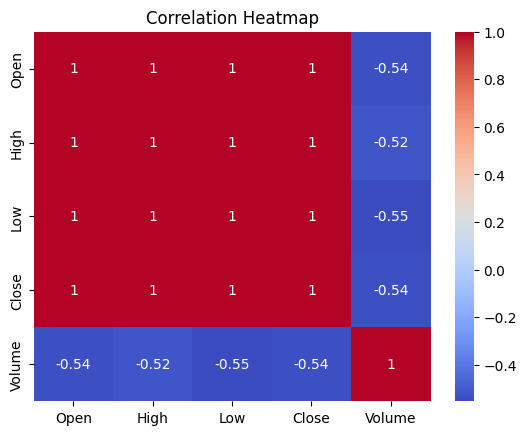

In [ ]:
sns.heatmap(df[['Open','High','Low','Close','Volume']].corr(),annot=True,cmap='coolwarm')

plt.title("Correlation Heatmap")

plt.show()

In [ ]:
print(df.head())
df.tail()

                 Open       High        Low      Close     Volume  MA20  MA50  \
Date                                                                            
2020-01-02  71.627092  72.681289  71.373218  72.620842  135480400   NaN   NaN   
2020-01-03  71.847125  72.676454  71.689965  71.914825  146322800   NaN   NaN   
2020-01-06  71.034709  72.526533  70.783248  72.487846  118387200   NaN   NaN   
2020-01-07  72.497522  72.753816  71.926907  72.146935  108872000   NaN   NaN   
2020-01-08  71.849525  73.609737  71.849525  73.307503  132079200   NaN   NaN   

            Daily_Return  
Date                      
2020-01-02           NaN  
2020-01-03     -0.009722  
2020-01-06      0.007968  
2020-01-07     -0.004703  
2020-01-08      0.016086  


,Open,High,Low,Close,Volume,MA20,MA50,Daily_Return
Date,,,,,,,,
2021-12-27,173.816573,177.085022,173.796954,176.996689,74919600,168.293611,156.582913,0.022975
2021-12-28,176.829866,177.978237,175.229990,175.975937,79144300,169.228503,157.263321,-0.005767
2021-12-29,176.015191,177.291165,174.847185,176.064270,62348900,169.919490,157.911976,0.000502
2021-12-30,176.152596,177.232269,174.798100,174.906067,59773000,170.578577,158.494148,-0.006578
2021-12-31,174.798143,175.917070,173.983483,174.287766,64062300,171.256316,159.054154,-0.003535


In [ ]:
df.shape

(505, 8)

In [ ]:
df = df.dropna()


In [ ]:
df.rename(columns={ "Close": "Value"}, inplace=True)
df

<ipython-input-20-4104775653>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={ "Close": "Value"}, inplace=True)


,Open,High,Low,Value,Volume,MA20,MA50,Daily_Return
Date,,,,,,,,
2020-03-13,64.199060,67.841748,61.305263,67.369141,370732000,70.923005,74.025906,0.119808
2020-03-16,58.639296,62.790941,58.166693,58.702312,322423600,69.920358,73.747535,-0.128647
2020-03-17,59.986828,62.434675,57.778917,61.283463,324056000,69.118869,73.534908,0.043970
2020-03-18,58.110947,60.590301,57.468687,59.783237,300233600,68.186385,73.280816,-0.024480
2020-03-19,59.957747,61.278615,58.799260,59.325184,271857200,67.271229,73.024381,-0.007662
...,...,...,...,...,...,...,...,...
2021-12-27,173.816573,177.085022,173.796954,176.996689,74919600,168.293611,156.582913,0.022975
2021-12-28,176.829866,177.978237,175.229990,175.975937,79144300,169.228503,157.263321,-0.005767
2021-12-29,176.015191,177.291165,174.847185,176.064270,62348900,169.919490,157.911976,0.000502


In [ ]:
df_new = df[["Value"]]
df_new.head()

,Value
Date,
2020-03-13,67.369141
2020-03-16,58.702312
2020-03-17,61.283463
2020-03-18,59.783237
2020-03-19,59.325184


## 🔹 Stationarity Check (ADF Test)

In [ ]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(df['Daily_Return'].dropna())
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
for key, value in adf_result[4].items():
  print(f"Critical Value ({key}): {value}")

if adf_result[1] < 0.05:
  print("Series is stationary")
else:
  print("Series is not stationary (consider differencing)")

ADF Statistic: -26.28462285831918
p-value: 0.0
Critical Value (1%): -3.4448040131772584
Critical Value (5%): -2.8679131843980197
Critical Value (10%): -2.5701646673107112
Series is stationary


## 🔹 Seasonal Decomposition

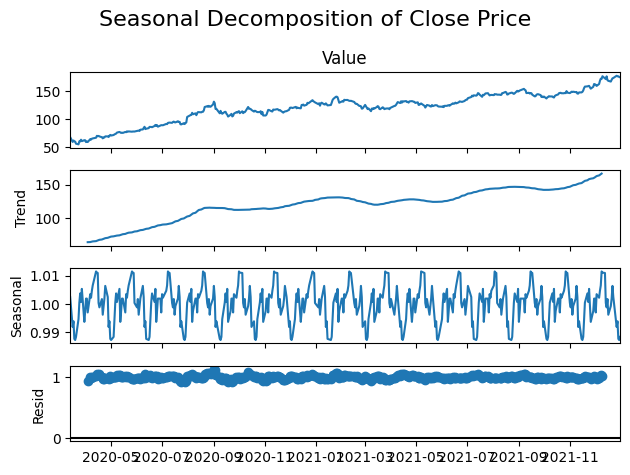

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Value'], model='multiplicative', period=30)
result.plot()
plt.suptitle("Seasonal Decomposition of Close Price", fontsize=16)
plt.tight_layout()
plt.show()


## 🔹 Step 5: ACF & PACF Plots

<Figure size 1000x400 with 0 Axes>

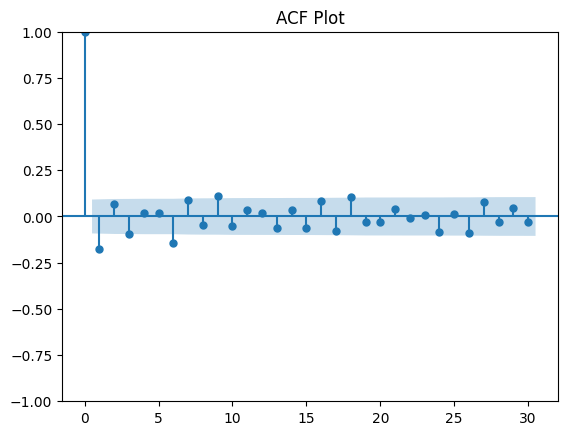

<Figure size 1000x400 with 0 Axes>

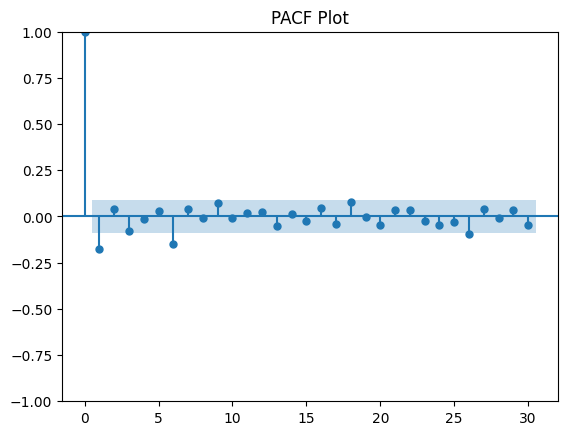

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(10,4))
plot_acf(df['Daily_Return'].dropna(), lags=30)
plt.title("ACF Plot")
plt.show()

plt.figure(figsize=(10,4))
plot_pacf(df['Daily_Return'].dropna(), lags=30)
plt.title("PACF Plot")
plt.show()


In [ ]:
print("Skewness:", df['Daily_Return'].skew())
print("Kurtosis:", df['Daily_Return'].kurt())


Skewness: 0.11932004612479225
Kurtosis: 6.025611753457968


## 🔹 Prophet-Compatible Date Check

In [42]:


print("Inferred frequency:", pd.infer_freq(df.index))

full_range = pd.date_range(start=df.index.min(), end=df.index.max())
missing_dates = full_range.difference(df.index)
print("Missing dates:", len(missing_dates))

if missing_dates.empty:
    print(" No missing dates")
else:
    print("Prophet prefers continuous dates — fill gaps or interpolate if necessary")


Inferred frequency: None
Missing dates: 203
Prophet prefers continuous dates — fill gaps or interpolate if necessary


In [43]:
# 1. Create full date range
full_range = pd.date_range(start=df.index.min(), end=df.index.max())

# 2. Reindex and forward-fill
df_filled = df.reindex(full_range)
df_filled.ffill(inplace=True)  # or use .interpolate(method='linear')

# 3. Reset index and rename for Prophet
df_filled = df_filled[['Value']].reset_index().rename(columns={"index": "ds", "Value": "y"})
df_filled.head()


,ds,y
0,2020-03-13,67.369141
1,2020-03-14,67.369141
2,2020-03-15,67.369141
3,2020-03-16,58.702312
4,2020-03-17,61.283463


In [44]:
print("New frequency:", pd.infer_freq(pd.to_datetime(df_filled['ds'])))


New frequency: D


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg_h5n1xb/c15erc4o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg_h5n1xb/10ovw743.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10169', 'data', 'file=/tmp/tmpg_h5n1xb/c15erc4o.json', 'init=/tmp/tmpg_h5n1xb/10ovw743.json', 'output', 'file=/tmp/tmpg_h5n1xb/prophet_modelsq04vnm_/prophet_model-20250618064722.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:47:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:47:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


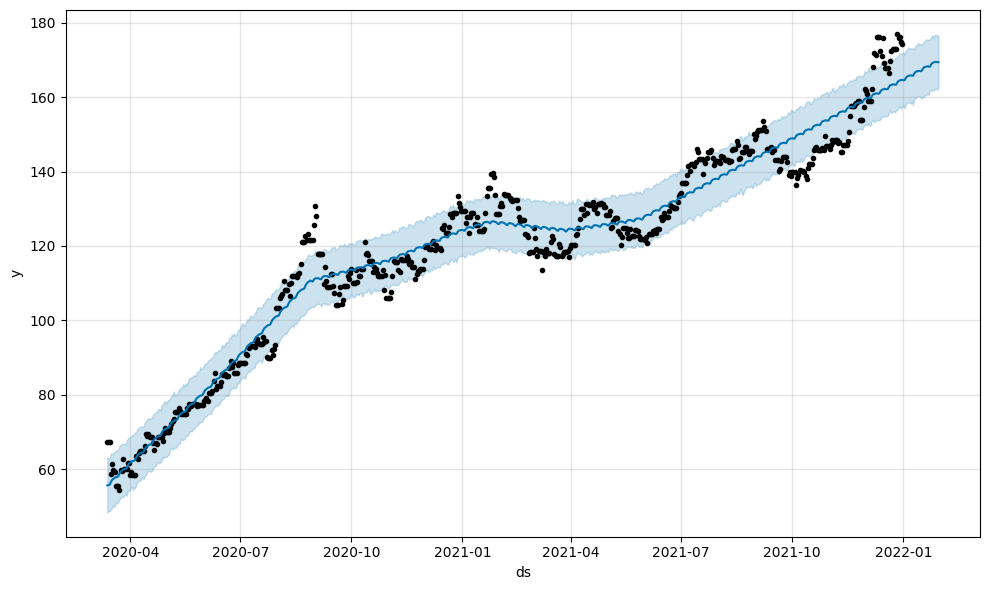

In [45]:
from prophet import Prophet

model = Prophet()
model.fit(df_filled)

future = model.make_future_dataframe(periods=30)  # predict 30 days ahead
forecast = model.predict(future)

model.plot(forecast)
plt.show()


## 🔹Lagged Correlation Heatmap for LSTM

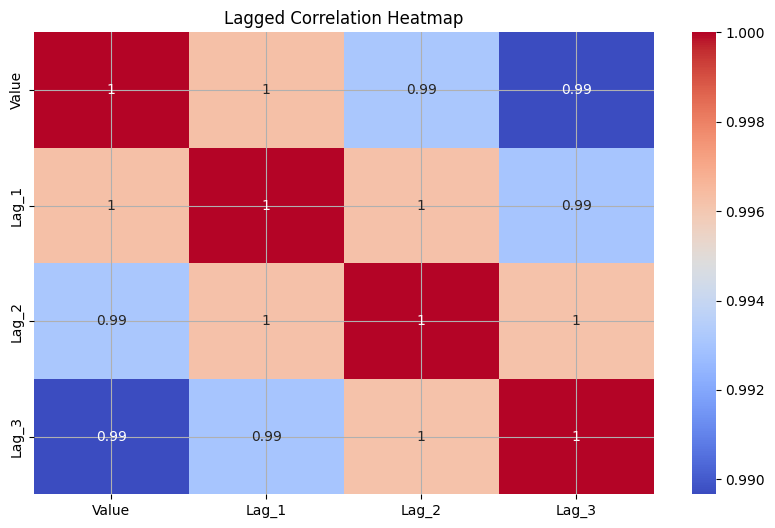

In [ ]:
# Heatmap of lagged features for LSTM insight
import seaborn as sns
import matplotlib.pyplot as plt

for lag in [1, 2, 3]:
    df[f'Lag_{lag}'] = df['Value'].shift(lag)

plt.figure(figsize=(10, 6))
sns.heatmap(df[['Value', 'Lag_1', 'Lag_2', 'Lag_3']].corr(), annot=True, cmap='coolwarm')
plt.title("Lagged Correlation Heatmap")
plt.grid(True)
plt.show()


## 🔹Rolling Volatility Plot

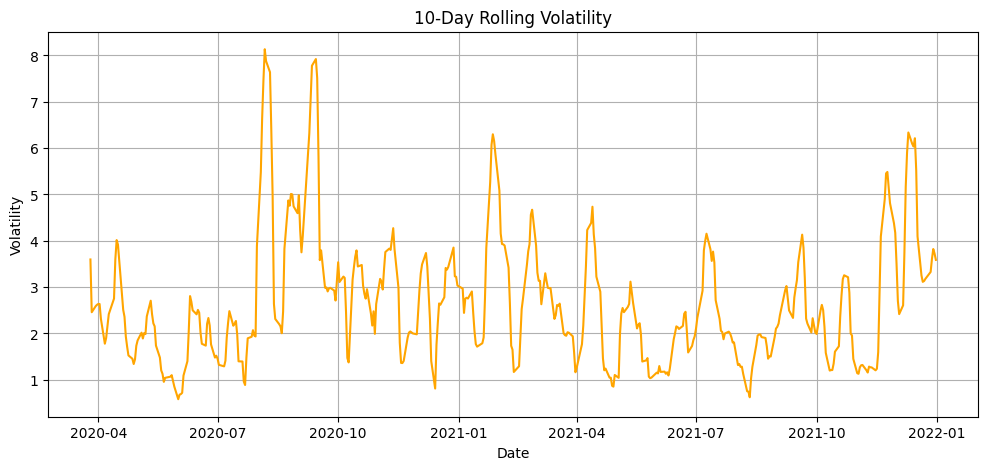

In [ ]:
# Rolling 10-day volatility (std dev of Value)
df['Rolling_STD_10'] = df['Value'].rolling(window=10).std()

plt.figure(figsize=(12, 5))
plt.plot(df['Rolling_STD_10'], color='orange')
plt.title("10-Day Rolling Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.grid(True)
plt.show()
